In [ ]:
!pip install gensim
!pip install nltk

In [1]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [3]:
stock_df = pd.read_csv("stock_sentiment.csv")
print(stock_df.head())
print(stock_df.info())
print(stock_df.isnull().sum())

                                                Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB
None
Text         0
Sentiment    0
dtype: int64


In [4]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    return Test_punc_removed_join

stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)
stock_df.head()
stock_df['Text'][2]
stock_df['Text Without Punctuation'][2]


'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

In [7]:
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\annah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject','re', 'edu', 'use', 'will', 'aap', 'co', 'day','user','stock','today','week','year'])


In [9]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
    return result


In [11]:
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)
print(stock_df['Text'][0])
print(stock_df['Text Without Punc & Stopwords'][0])
print(stock_df.head())

Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']
                                                Text  ...                      Text Without Punc & Stopwords
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  ...  [kickers, watchlist, xide, tit, soq, pnk, cpw,...
1  user: AAP MOVIE. 55% return for the FEA/GEED i...  ...  [movie, return, feageed, indicator, trades, aw...
2  user I'd be afraid to short AMZN - they are lo...  ...  [afraid, short, amzn, looking, like, nearmonop...
3                                  MNTA Over 12.00    ...                                             [mnta]
4                                   OI  Over 21.37    ...                                                 []

[5 rows x 4 columns]


In [12]:
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))


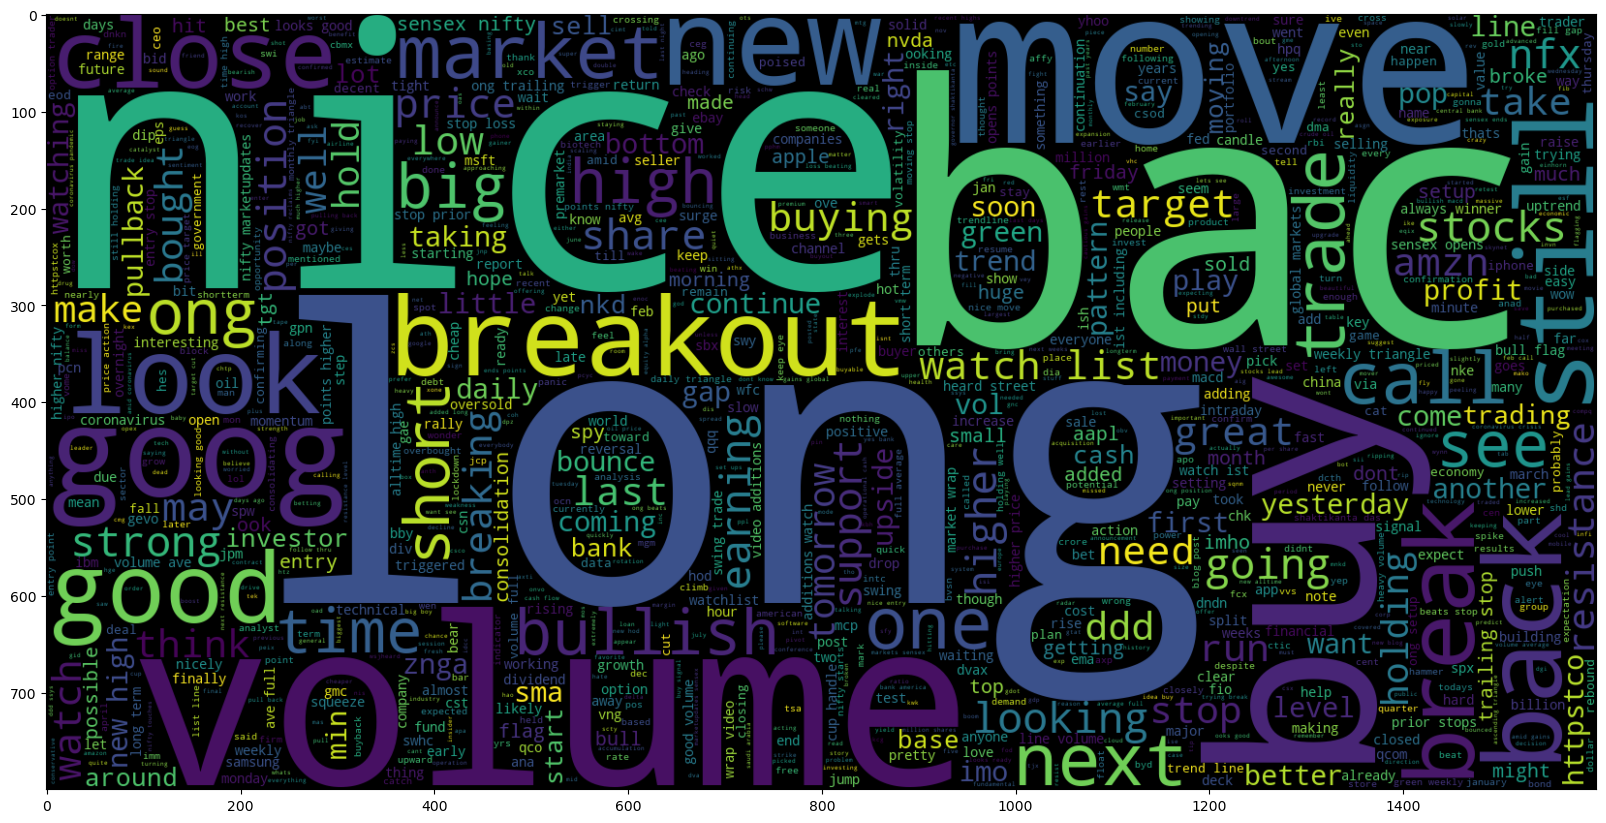

In [14]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear')

In [15]:
stock_df.head()
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\annah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))


kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [20]:
maxlen = -1

for doc in stock_df['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if (maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maxiumn number of words in any document is:", maxlen)

The maxiumn number of words in any document is: 20


In [21]:
tweets_length = [len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined']]
print(tweets_length)

[14, 6, 7, 1, 0, 1, 8, 13, 8, 4, 10, 18, 8, 8, 11, 5, 12, 10, 12, 4, 6, 5, 2, 5, 3, 10, 3, 3, 9, 6, 8, 10, 8, 3, 10, 11, 4, 8, 11, 10, 10, 7, 9, 8, 4, 10, 8, 7, 7, 9, 10, 10, 8, 2, 14, 12, 9, 8, 1, 14, 7, 11, 5, 13, 6, 6, 7, 6, 6, 10, 9, 4, 10, 13, 16, 6, 9, 6, 2, 11, 5, 4, 9, 11, 16, 4, 9, 5, 6, 2, 1, 5, 9, 4, 7, 6, 7, 10, 1, 3, 9, 4, 16, 8, 10, 11, 18, 6, 7, 13, 12, 9, 3, 3, 10, 10, 8, 6, 8, 5, 5, 8, 9, 15, 3, 5, 9, 18, 13, 11, 3, 1, 1, 2, 7, 12, 12, 8, 8, 10, 9, 10, 15, 8, 9, 9, 12, 10, 6, 10, 13, 4, 11, 8, 15, 13, 8, 12, 5, 5, 3, 7, 2, 4, 10, 5, 6, 10, 6, 16, 9, 6, 5, 10, 9, 10, 8, 2, 10, 9, 10, 12, 7, 10, 7, 3, 6, 5, 9, 9, 4, 6, 5, 4, 4, 8, 10, 8, 8, 13, 9, 7, 10, 12, 8, 6, 5, 3, 10, 11, 6, 9, 10, 13, 10, 7, 12, 7, 11, 10, 4, 4, 3, 10, 2, 9, 10, 15, 12, 10, 13, 9, 8, 2, 1, 12, 12, 6, 9, 9, 12, 5, 2, 3, 8, 6, 14, 5, 6, 7, 9, 1, 1, 11, 7, 14, 4, 4, 9, 5, 4, 9, 9, 10, 13, 5, 11, 4, 4, 6, 1, 8, 4, 11, 4, 6, 11, 4, 10, 8, 8, 6, 10, 3, 10, 10, 2, 9, 10, 13, 9, 10, 3, 2, 8, 4, 6, 14, 5, 

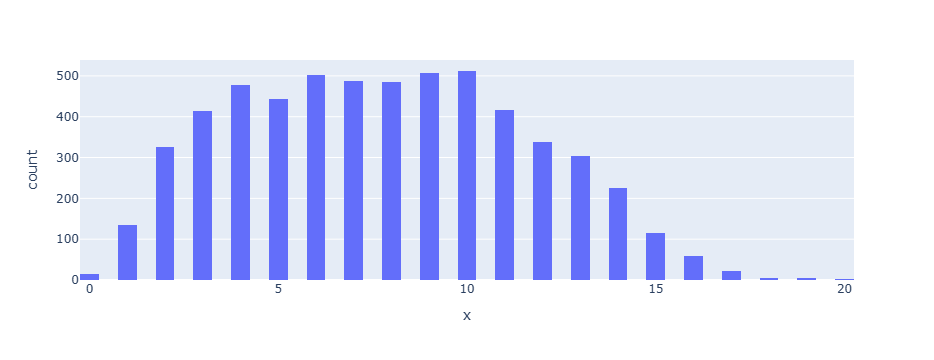

In [22]:
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

In [26]:
print(stock_df)
print(stock_df.columns)

                                                   Text  ...               Text Without Punc & Stopwords Joined
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  ...  kickers watchlist xide tit soq pnk cpw bpz tra...
1     user: AAP MOVIE. 55% return for the FEA/GEED i...  ...      movie return feageed indicator trades awesome
2     user I'd be afraid to short AMZN - they are lo...  ...  afraid short amzn looking like nearmonopoly eb...
3                                     MNTA Over 12.00    ...                                               mnta
4                                      OI  Over 21.37    ...                                                   
...                                                 ...  ...                                                ...
5786  Industry body CII said #discoms are likely to ...  ...  industry body cii said discoms likely suffer n...
5787  #Gold prices slip below Rs 46,000 as #investor...  ...  gold prices slip investors book profits am

In [27]:
list_of_words = []
for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)
print(list_of_words)

['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts', 'movie', 'return', 'feageed', 'indicator', 'trades', 'awesome', 'afraid', 'short', 'amzn', 'looking', 'like', 'nearmonopoly', 'ebooks', 'mnta', 'pgnx', 'current', 'downtrend', 'break', 'otherwise', 'shortterm', 'correction', 'medterm', 'downtrend', 'mondays', 'relative', 'weakness', 'nyx', 'win', 'tie', 'tap', 'ice', 'int', 'bmc', 'aon', 'chk', 'biib', 'goog', 'ower', 'trend', 'line', 'channel', 'test', 'volume', 'support', 'watch', 'tomorrow', 'ong', 'entry', 'assuming', 'fcx', 'opens', 'tomorrow', 'trigger', 'buy', 'still', 'much', 'like', 'setup', 'really', 'worries', 'everyone', 'expects', 'market', 'rally', 'nowusually', 'exact', 'opposite', 'happens', 'every', 'time', 'shall', 'see', 'soon', 'bac', 'spx', 'jpm', 'gamcos', 'arry', 'haverty', 'apple', 'extremely', 'cheap', 'great', 'video', 'maykiljil', 'posted', 'agree', 'msft', 'going', 'higher', 'possibly', 'n

In [31]:
total_words = len(list(set(list_of_words)))
print("Total number of unique words:", total_words)

Total number of unique words: 9268


In [32]:
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42) # Split into train and temp (test + validation)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42) # Split temp into test and validation

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)

X_train shape: (4632,)
X_test shape: (579,)
X_val shape: (580,)


In [33]:
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)


In [35]:
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
val_sequences = tokenizer.texts_to_sequences(X_val)
print("Example train sequence:", train_sequences[0])


Example train sequence: [564, 2267, 74, 194, 997, 159, 1166, 1718]


In [36]:
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences, maxlen = 29, padding = 'post', truncating = 'post')

print("Padded training sequence shape:", padded_train.shape)
print("Padded testing sequence shape:", padded_test.shape)
print("Padded validation sequence shape:", padded_val.shape)


Padded training sequence shape: (4632, 29)
Padded testing sequence shape: (579, 29)
Padded validation sequence shape: (580, 29)


In [37]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)
y_val_cat = to_categorical(y_val, 2)

print("Categorical training labels shape:", y_train_cat.shape)
print("Categorical testing labels shape:", y_test_cat.shape)
print("Categorical validation labels shape:", y_val_cat.shape)


Categorical training labels shape: (4632, 2)
Categorical testing labels shape: (579, 2)
Categorical validation labels shape: (580, 2)


In [42]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512, input_length=29))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

# train the model
history = model.fit(padded_train, y_train_cat, batch_size = 32, validation_data=(padded_val, y_val_cat), epochs = 2)


C:\Users\annah\AppData\Local\anaconda3\envs\py3_12\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
145/145 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - acc: 0.6408 - loss: 0.6485 - val_acc: 0.7259 - val_loss: 0.5670
Epoch 2/2
145/145 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - acc: 0.7992 - loss: 0.4769 - val_acc: 0.7638 - val_loss: 0.5126


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
Accuracy: 0.7789291882556131
              precision    recall  f1-score   support

           0       0.77      0.51      0.62       201
           1       0.78      0.92      0.84       378

    accuracy                           0.78       579
   macro avg       0.78      0.72      0.73       579
weighted avg       0.78      0.78      0.77       579



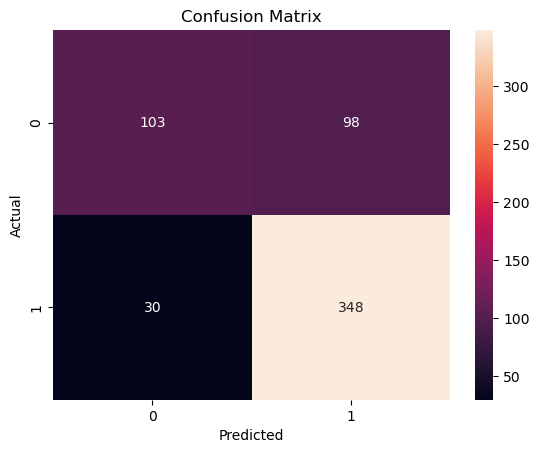

R-squared: 0.024559740977651345
Mean Squared Error: 0.22107081174438686


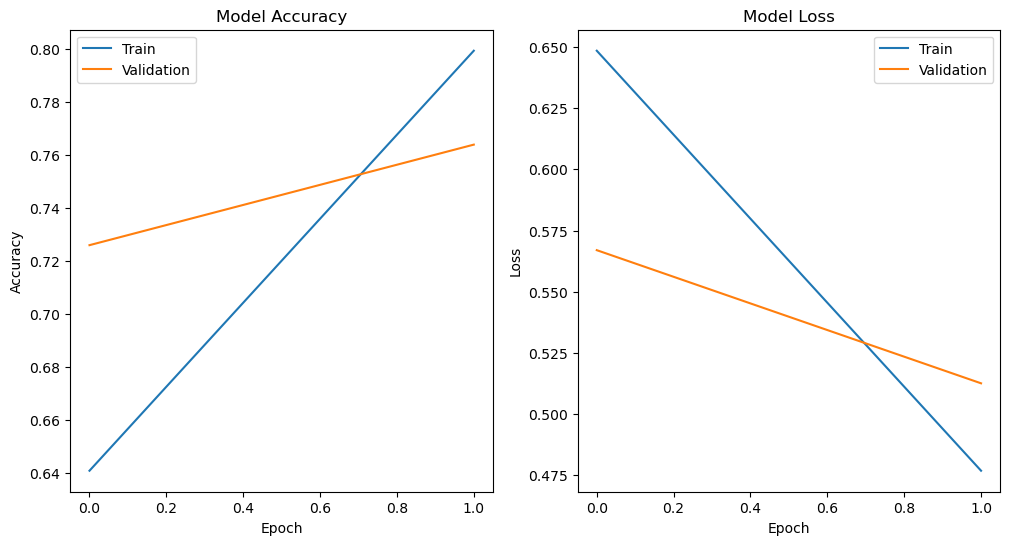

In [43]:
# make prediction
pred = model.predict(padded_test)

# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report, confusion_matrix
# Print classification report
print(classification_report(original, prediction))

# Plot the confusion matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate R-squared and MSE (if applicable - may not be meaningful for categorical data)
r2 = r2_score(original, prediction)
mse = mean_squared_error(original, prediction)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [44]:
!pip install transformers

In [45]:
# Skipped for now
# from transformers import pipeline

# nlp = pipeline('sentiment-analysis')

# # Make prediction on the test data
# pred = nlp(list(X_test))

# # Since predicted value is a dictionary, get the label from the dict
# prediction = []
# for i in pred:
#   prediction.append(i['label'])

# # print the final results
# for i in range(len(prediction[:3])):
#   print("\n\nNews :\n\n", df[df.combined == X_test.values[i]].Text.item(), "\n\nOriginal value :\n\n",
#       category[df[df.combined == X_test.values[i]].Sentiment.item()], "\n\nPredicted value :\n\n", prediction[i], "\n\n\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\annah\AppData\Local\anaconda3\envs\py3_12\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\annah\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



ValueError: Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.